In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# display maximum colum and rows
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [ ]:
df = pd.read_excel("hands_on.xlsx", sheet_name='Sheet1')
df.head()

,id_event,invoice_date,Sold,Transaction,event_start_date,event_end_date,status_event,Ratio
0,5016,2018-09-10,2555,2555.0,2018-12-09,2018-12-09,Past Event,0.174224
1,5016,2018-09-11,2308,2308.0,2018-12-09,2018-12-09,Past Event,0.157382
2,5016,2018-09-12,1328,780.0,2018-12-09,2018-12-09,Past Event,0.090556
3,5016,2018-09-13,1290,306.0,2018-12-09,2018-12-09,Past Event,0.087965
4,5016,2018-09-14,1176,204.0,2018-12-09,2018-12-09,Past Event,0.080191


In [ ]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_event          210 non-null    int64         
 1   invoice_date      210 non-null    datetime64[ns]
 2   Sold              210 non-null    int64         
 3   Transaction       210 non-null    float64       
 4   event_start_date  210 non-null    datetime64[ns]
 5   event_end_date    210 non-null    datetime64[ns]
 6   status_event      210 non-null    object        
 7   Ratio             210 non-null    float64       
dtypes: datetime64[ns](3), float64(2), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,id_event,Sold,Transaction,Ratio
count,210.000000,210.000000,210.000000,210.000000
mean,10005.000000,184.323810,91.774603,0.012371
std,5487.609567,605.908326,345.019624,0.029486
min,5016.000000,0.000000,0.000000,0.000000
25%,5016.000000,19.000000,9.000000,0.001640
50%,11179.000000,65.500000,28.500000,0.004569
75%,11179.000000,119.500000,46.750000,0.009758
max,21450.000000,7584.000000,3467.000000,0.303360


In [ ]:
df.shape

(210, 8)

In [ ]:
# check kategorikal type
df.groupby('status_event')['id_event'].unique()

status_event
Active Event          [21450]
Past Event      [5016, 11179]
Name: id_event, dtype: object

In [ ]:
# Extract event needed
event_A = df[df.id_event == 5016].reset_index()
event_B = df[df.id_event == 11179].reset_index()
event_C = df[df.id_event == 21450].reset_index()

Text(0, 0.5, 'Ratio')

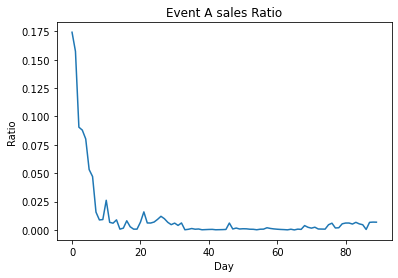

In [ ]:
event_A.Ratio.plot.line(title='Event A sales Ratio')
plt.xlabel('Day')
plt.ylabel('Ratio')

Text(0, 0.5, 'Ratio')

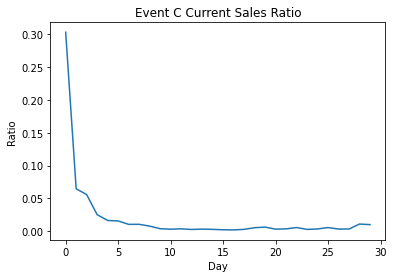

In [ ]:
event_C.Ratio.plot.line(title = 'Event C Current Sales Ratio')
plt.xlabel('Day')
plt.ylabel('Ratio')

# How we can gain the insight
 The a look back, object from insight is to make a action plan

In [ ]:
event_C['invoice_date'] = pd.to_datetime(event_C['invoice_date']).dt.date
event_C['event_start_date'] = pd.to_datetime(event_C['event_start_date']).dt.date
event_C['event_end_date'] = pd.to_datetime(event_C['event_end_date']).dt.date

Text(0, 0.5, 'Ratio')

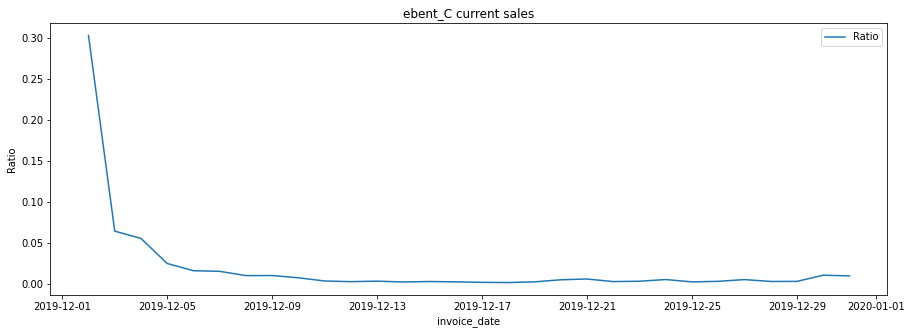

In [ ]:
# let's take a look at the sales
event_C.plot.line('invoice_date', 'Ratio', figsize=(15, 5), title = 'ebent_C current sales')
plt.ylabel('Ratio')

In [ ]:
event_C.event_end_date.nunique()

1

In [ ]:
print('start event date = ', event_C.event_start_date[0])
print('start end date = ', event_C.event_end_date[0])

start event date =  2020-06-27
start end date =  2020-06-27


In [ ]:
event_C.Sold.sum()

14948

In [ ]:
event_C.Sold.mean()

498.26666666666665

In [ ]:
event_C.head(10)

,index,id_event,invoice_date,Sold,Transaction,event_start_date,event_end_date,status_event,Ratio
0,180,21450,2019-12-02,7584,3467.0,2020-06-27,2020-06-27,Active Event,0.30336
1,181,21450,2019-12-03,1616,766.0,2020-06-27,2020-06-27,Active Event,0.06464
2,182,21450,2019-12-04,1394,702.0,2020-06-27,2020-06-27,Active Event,0.05576
3,183,21450,2019-12-05,629,321.0,2020-06-27,2020-06-27,Active Event,0.02516
4,184,21450,2019-12-06,408,206.0,2020-06-27,2020-06-27,Active Event,0.01632
5,185,21450,2019-12-07,390,197.0,2020-06-27,2020-06-27,Active Event,0.01560
6,186,21450,2019-12-08,260,138.0,2020-06-27,2020-06-27,Active Event,0.01040
7,187,21450,2019-12-09,261,122.0,2020-06-27,2020-06-27,Active Event,0.01044
8,188,21450,2019-12-10,193,97.0,2020-06-27,2020-06-27,Active Event,0.00772
9,189,21450,2019-12-11,95,44.0,2020-06-27,2020-06-27,Active Event,0.00380


In [ ]:
event_C[4:].Sold.mean()

143.26923076923077

In [ ]:
event_C.Sold.median()

113.5

Oke, make assummption maximum 114 tikets sold per day.
But we have extremenly drop month on Ramadhan :(

In [ ]:
114*30*3

10260

In [ ]:
# that's not the secure number. need chect trafic day

In [ ]:
event_C['invoice_day'] = pd.to_datetime(event_C['invoice_date']).dt.weekday


In [ ]:
event_C['invoice_weekday'] = event_C.invoice_day.replace({0:'Monday',
                                                          1: 'tuesdat',
                                                          2: 'Wednesday',
                                                          3: 'Thursday',
                                                          4: 'Friday',
                                                          5: 'Saturday',
                                                          6: 'Sunday'})

In [ ]:
event_C.groupby(['invoice_weekday'])['Transaction'].sum()

invoice_weekday
Friday        381.0
Monday       3806.0
Saturday      362.0
Sunday        255.0
Thursday      421.0
Wednesday     811.0
tuesdat      1135.0
Name: Transaction, dtype: float64

Text(0, 0.5, 'days')

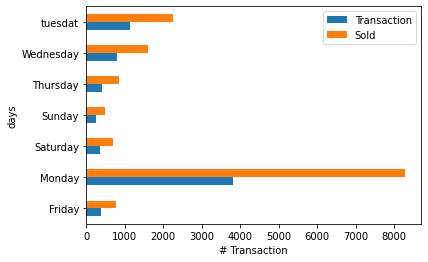

In [ ]:

event_C.groupby(['invoice_weekday'])[['Transaction','Sold']].sum().plot.barh()
plt.xlabel('# Transaction')
plt.ylabel('days')

Text(0, 0.5, 'days')

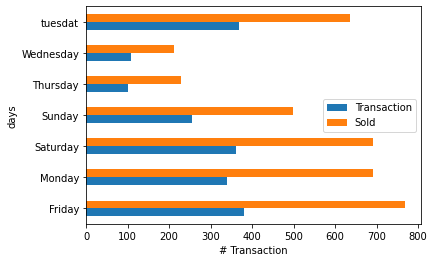

In [ ]:

event_C[4:].groupby(['invoice_weekday'])[['Transaction','Sold']].sum().plot.barh()
plt.xlabel('# Transaction')
plt.ylabel('days')

In [ ]:
week = event_C[4:].groupby(['invoice_weekday'])[['Transaction','Sold']].sum()

In [ ]:
week

,Transaction,Sold
invoice_weekday,,
Friday,381.0,768
Monday,339.0,690
Saturday,362.0,692
Sunday,255.0,499
Thursday,100.0,229
Wednesday,109.0,211
tuesdat,369.0,636


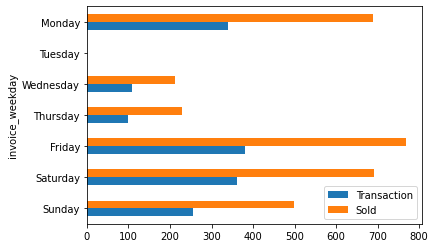

In [ ]:
week.reindex(index = ['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']).plot.barh()

#Information :
1. 5 months left befor D-Day
2. 14.948 of 25.000 tickets sold (59%)
3. Reach average 114 tickets per day
4. The traffic of transaction peak on Friday
5. 2 tickets sold on once transactions
6. If constan selling +- 114 ticket/day till end, ticket will be sold out.
#Insight and action plan
1. More intensified publication and announcement on Thursday, 12-14 PM and 19-21 PM
2. Ramadhan need to make some publication plan again
3. We can implement promo using bundle 2 tickets